In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("dark_background")

In [18]:
target_path = "../data/target/clean/bcpr.csv"
feature_path = "../data/feature/all.csv"


In [19]:
target_df = pd.read_csv(target_path)
target_df.set_index("date", inplace=True)


Target Modification

Important, because we are trying to PREDICT the percent change, we need to shift the X data once more, otherwise we are just predicting something that has already happened, which is not really a prediction.

In [20]:
target = target_df["bcpr_pct_change"]
target = target.shift(1)[2:]
dates = target.index.tolist()
target = target.to_numpy()

feature selection

In [21]:
# add feature loader later
feature_df = pd.read_csv(feature_path)
feature_df.set_index("date", inplace=True)

In [22]:
feature = feature_df.to_numpy()

Confirm data is the same length

In [23]:
len(target) == len(feature)

True

Scale feature data

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [29]:
sf = scaler.fit_transform(feature)

Plot results

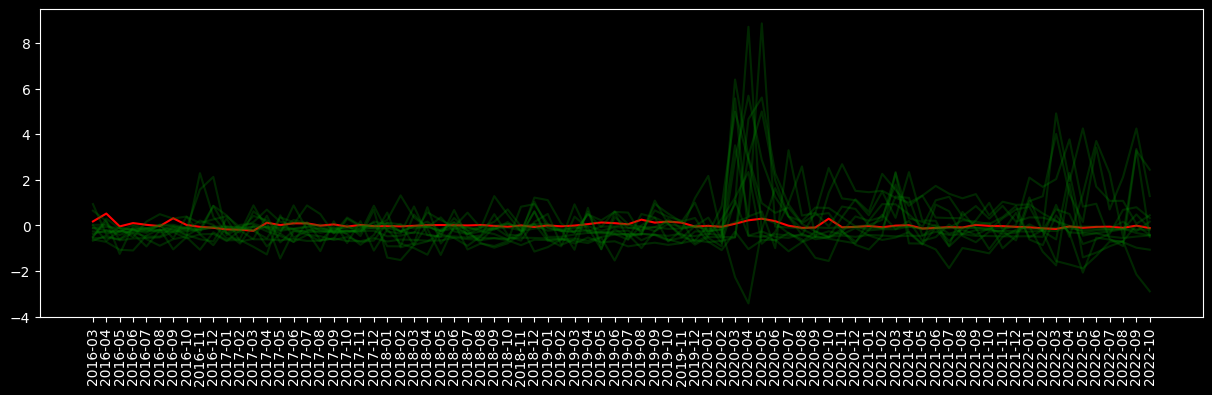

In [32]:
plt.figure(figsize=(15,4))
sns.lineplot(x=dates, y=target, color="red")
for i in range(sf.shape[1]):
    sns.lineplot(x=dates, y=sf[:, i], color="green", alpha=0.3)
plt.xticks(rotation=90)
plt.show()

# And actually building the model

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report

Starting with simple logistic regression algorithm, note that the data must be discretized for this to work

In [34]:
bool_target = (target > 0).astype(int)

In [35]:
logreg = LogisticRegression()
logreg.fit(feature, bool_target)
logreg.score(feature, bool_target)

0.6625

Going down
- TP: predicts going down, goes down
- TN: predict going up, goes up 
- FP: predicts going down, goes up
- FN: predicts going up, goes down

Going up:
- TP: predicts going up, goes up 
- TN: predicts going down, goes down
- FP: predicts going up, goes down
- FN: predicts going down, goes up

In [37]:
print(classification_report(logreg.predict(feature), bool_target))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        55
           1       0.47      0.64      0.54        25

    accuracy                           0.66        80
   macro avg       0.64      0.66      0.64        80
weighted avg       0.70      0.66      0.67        80



caveats:
- using features pulled out of a hat
- using limited temporal horizon
- using basic logistic regression model
- no hyperparameter optimization was done
- no train test split was done
- you would want to be able to test the model by keeping track of the predictions it makes over time

recommendations:
- address the caveats above
- train multiple models

implementation:
- as a data pipline which is accessible through an API or dashboard (may be out of scope for current task)